In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

In [4]:
iris_data= load_iris()

In [5]:
x = iris_data.data
y = iris_data.target

In [6]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
data = pd.DataFrame(x,columns=iris_data.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
data['target'] = y

In [11]:
data.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
71,6.1,2.8,4.0,1.3,1
93,5.0,2.3,3.3,1.0,1
45,4.8,3.0,1.4,0.3,0
29,4.7,3.2,1.6,0.2,0
21,5.1,3.7,1.5,0.4,0


In [12]:
lda =LDA(n_components=2)

In [13]:
lda.fit(x,y)

LinearDiscriminantAnalysis(n_components=2)

In [14]:
x_reduced =lda.transform(x)

In [15]:
x_reduced[:5]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449],
       [ 6.81320057, -0.67063107],
       [ 8.13230933,  0.51446253]])

In [16]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
class_0=x_reduced[:50]
class_1=x_reduced[50:100]
class_2=x_reduced[100:]

In [18]:
class_0[:5]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449],
       [ 6.81320057, -0.67063107],
       [ 8.13230933,  0.51446253]])

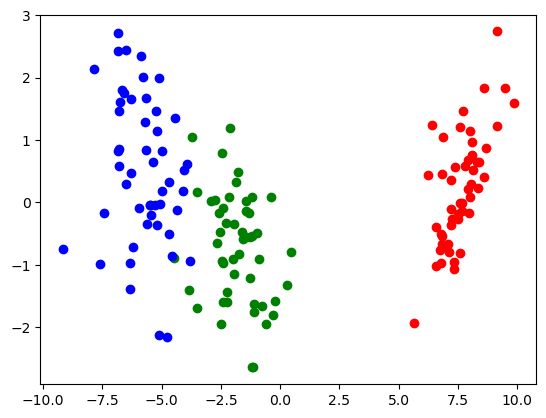

In [19]:
plt.scatter(class_0[:,0],class_0[:,1],c='r')
plt.scatter(class_1[:,0],class_1[:,1],c='g')
plt.scatter(class_2[:,0],class_2[:,1],c='b')
plt.show()

In [20]:
pca= PCA(n_components=2)

In [21]:
pca.fit_transform(x)
x_reduced=pca.fit_transform(x)

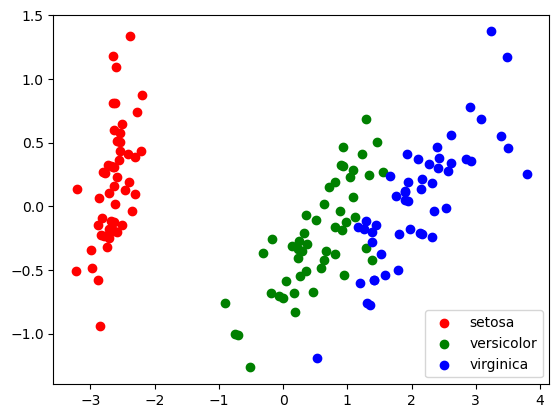

In [22]:
plt.scatter(x_reduced[y==0,0],x_reduced[y==0,1],c='r')
plt.scatter(x_reduced[y==1,0],x_reduced[y==1,1],c='g')
plt.scatter(x_reduced[y==2,0],x_reduced[y==2,1],c='b')
plt.legend(iris_data.target_names)
plt.show()


In [23]:
from sklearn.datasets import load_wine

In [24]:
wine_data= load_wine()

In [25]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [26]:
data=wine_data.data
wine_class = wine_data.target

In [27]:
lda =LDA(n_components=2)
pca =PCA(n_components=2)

In [28]:
lda_reduced= lda.fit_transform(data,wine_class)
pca_reduced= pca.fit_transform(data,wine_class)

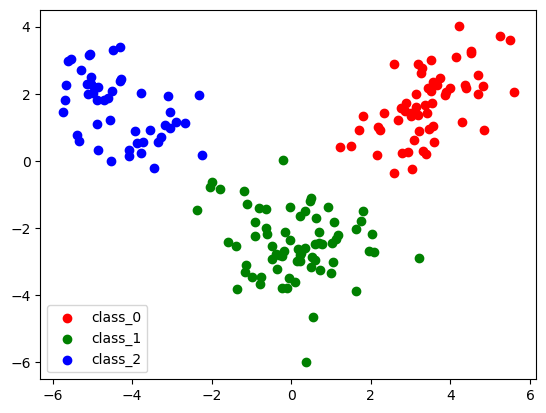

In [30]:
plt.scatter(lda_reduced[wine_class==0,0],lda_reduced[wine_class==0,1],c='r')
plt.scatter(lda_reduced[wine_class==1,0],lda_reduced[wine_class==1,1],c='g')
plt.scatter(lda_reduced[wine_class==2,0],lda_reduced[wine_class==2,1],c='b')
plt.legend(wine_data.target_names)
plt.show()


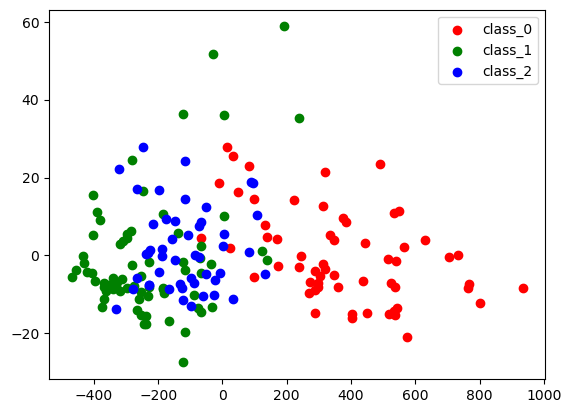

In [32]:
plt.scatter(pca_reduced[wine_class==0,0],pca_reduced[wine_class==0,1],c='r')
plt.scatter(pca_reduced[wine_class==1,0],pca_reduced[wine_class==1,1],c='g')
plt.scatter(pca_reduced[wine_class==2,0],pca_reduced[wine_class==2,1],c='b')
plt.legend(wine_data.target_names)
plt.show()
